In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
SAVEFIG = False

In [2]:
df = pd.read_csv("simu5_data/simu5_Murdock.csv",header=None)
df

,0,1,2,3
0,0.015106,0.894737,0,Mean
1,0.022659,0.994152,0,SD+1
2,0.015106,0.794152,0,SD-1
3,0.989426,0.625731,1,Mean
4,0.989426,0.757895,1,SD+1
5,0.989426,0.508772,1,SD-1
6,2.009063,0.333333,2,Mean
7,2.001511,0.464327,2,SD+1
8,1.993958,0.216374,2,SD-1
9,2.998489,0.269006,3,Mean


In [3]:
df = df.pivot_table(index=2,columns=3,values=1).reset_index(drop=True)
df

3,Mean,SD+1,SD-1
0,0.894737,0.994152,0.794152
1,0.625731,0.757895,0.508772
2,0.333333,0.464327,0.216374
3,0.269006,0.380117,0.164912
4,0.256140,0.376608,0.136842
5,0.265497,0.395322,0.141520


In [4]:
df['SD1'] = df[' SD+1'] - df[' Mean']
df['SD2'] = df[' Mean'] - df[' SD-1']
df['SD'] = df[['SD1','SD2']].mean(axis=1)
df['X'] = np.arange(0,6)
df['Y'] = df[' Mean']
df

3,Mean,SD+1,SD-1,SD1,SD2,SD,X,Y
0,0.894737,0.994152,0.794152,0.099415,0.100585,0.100000,0,0.894737
1,0.625731,0.757895,0.508772,0.132164,0.116959,0.124561,1,0.625731
2,0.333333,0.464327,0.216374,0.130994,0.116959,0.123977,2,0.333333
3,0.269006,0.380117,0.164912,0.111111,0.104094,0.107602,3,0.269006
4,0.256140,0.376608,0.136842,0.120468,0.119298,0.119883,4,0.256140
5,0.265497,0.395322,0.141520,0.129825,0.123977,0.126901,5,0.265497


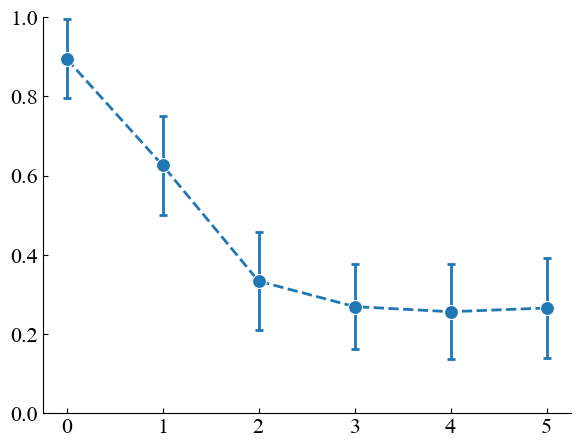

In [5]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
plt.errorbar(x=df['X'],y=df['Y'],yerr=df['SD'], linewidth=2, marker=None, capsize = 3, capthick = 2, linestyle='none')
sns.lineplot(data=df, y='Y', x='X', ax=ax, marker = 'o', color = 'C0', markersize = 10, linewidth = 2, linestyle='--')

plt.ylim([0,1])
plt.xlabel('Test Lag')
plt.ylabel('Probablility of Recall')
ax.set(xlabel=None, ylabel=None)

if SAVEFIG:
    plt.savefig('simu5_fig/simu5_Murdock.pdf')